# Unit 5 - Financial Planning #

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
%matplotlib inline 

In [2]:
 # Load .env enviroment variables
load_dotenv()

True

# Part 1 - Personal Finance Planner #
## Collect Crypto Prices Using the requests Library ##

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD" 

# Submit request and format output
btc_url = btc_url + "?format=json"
response_data = requests.get(btc_url).json()

# Fetch current BTC price
current_btc_value = response_data['data']['1']['quotes']['USD']['price']

# Submit request and format output
eth_url = eth_url + "?format=json"
response_data = requests.get(eth_url).json()

# Fetch current ETH price 
current_eth_value = response_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
btc_value = my_btc * current_btc_value
eth_value = my_eth * current_eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${current_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${current_eth_value:0.2f}")


The current value of your 1.2 BTC is $40268.00
The current value of your 5.3 ETH is $2985.34


## Collect Investments Data Using Alpaca: SPY (stocks) and AGG (bonds) ##

In [4]:
# Set current amount of shares
my_agg = 200
my_spy = 50 

# Set Alpaca API key and secret
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [6]:
# Format current date as ISO format
today = pd.Timestamp("2020-12-31", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_shares_bonds = api.get_bars(
    tickers,
    timeframe,
    start=today,
    end=today
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_shares_bonds[df_shares_bonds['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_shares_bonds[df_shares_bonds['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_shares_bonds = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Display sample data
df_shares_bonds

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2020-12-31 05:00:00+00:00  118.18  118.24  118.12  118.19  4834717   

                                                      SPY                   \
                          trade_count        vwap    open    high      low   
timestamp                                                                    
2020-12-31 05:00:00+00:00       17019  118.187165  371.85  374.66  371.232   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2020-12-31 05:00:00+00:00  373.88  78734159      301443  373.200854

In [7]:
# Fetch the current closing prices from the DataFrame
agg_close_price = float(df_shares_bonds["AGG"]["close"])
spy_close_price = float(df_shares_bonds["SPY"]["close"])
print(agg_close_price)
print(spy_close_price)

118.19
373.88


In [8]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy


# Print current value of shares
print(f"The current value of your {my_agg} AGG bonds is ${my_agg_value:0.2f}")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")



The current value of your 200 AGG bonds is $23638.00
The current value of your 50 SPY shares is $18694.00


 ## Savings Health Analysis ##

In [9]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_assets = (current_btc_value + current_eth_value) 
shares_assets = (my_agg_value + my_spy_value)


In [10]:
#Shares and crypto data
investment_data = {
    "amount" : [crypto_assets, shares_assets]
}



# Set the tickers
tickers = ["crypto", "shares"]


# Create savings DataFrame
df_savings = pd.DataFrame(investment_data, index=tickers)

# Display savings DataFrame
display(df_savings) 

,amount
crypto,43253.34
shares,42332.00


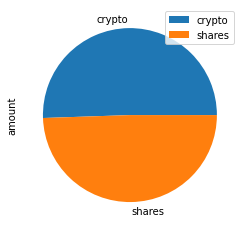

In [11]:
# Plot savings pie chart
df_savings.plot.pie(y=("amount"));

In [12]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_assets + shares_assets
print(f"My total amount of saving is ${total_savings:0.2f}")

# Validate saving health
if total_savings > emergency_fund:
    print(f"Congratulations! you have enough money in your emergency fund")
    
elif total_savings == emergency_fund:
    print(f"Congratulations! you have reached your financial goal")
    
else:
    print(f"Sorry! you are still missing ${total_savings - emergency_fund:0.2f} away from your financial goal")

My total amount of saving is $85585.34
Congratulations! you have enough money in your emergency fund


# Part 2 - Retirement Planning #

In [ ]:
Monte Carlo Simulation
 In [14]:  # Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat() 

# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!


# Concatenate the ticker DataFrames
# YOUR CODE HERE!

# Display sample data
df_stock_data.head()  

    
    
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE! 

# Printing the simulation input data
# YOUR CODE HERE!   
  
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!  

# Plot simulation outcomes
# YOUR CODE HERE!  

# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

## Retirement Analysis ## 

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!  

Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a $20,000 initial investment.
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")  Out [22]:  There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $95594.94 and $1281072.08
 Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a 50% increase in the initial investment.
 In [23]:  # Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")  Out [23]:  There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $143392.41 and $1921608.12
 Optional Challenge - Early Retirement
Five Years Retirement Option
 In [24]:  # Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!  In [25]:  # Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!  Out [25]:  Running Monte Carlo simulation number 0.

 In [26]:  # Plot simulation outcomes
# YOUR CODE HERE!  out [26]:   In [27]:  # Plot probability distribution and confidence intervals
# YOUR CODE HERE!  out [27]:   In [28]:  # Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!  Out [28]:  count           500.000000
mean              1.245905
std               0.160008
min               0.771559
25%               1.140795
50%               1.232555
75%               1.352284
max               1.733421
95% CI Lower      0.951523
95% CI Upper      1.586592
Name: 1260, dtype: float64
 In [29]:  # Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")  Out [29]:  There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57091.37 and $95195.55
 Ten Years Retirement Option
 In [30]:  # Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!  In [31]:  # Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!  Out [31]:  Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Monte Carlo simulation number 350.
Running Monte Carlo simulation number 360.
Running Monte Carlo simulation number 370.
Running Monte Carlo simulation number 380.
Running Monte Carlo simulation number 390.
Running Monte Carlo simulation number 400.
Running Monte Carlo simulation number 410.
Running Monte Carlo simulation number 420.
Running Monte Carlo simulation number 430.
Running Monte Carlo simulation number 440.
Running Monte Carlo simulation number 450.
Running Monte Carlo simulation number 460.
Running Monte Carlo simulation number 470.
Running Monte Carlo simulation number 480.
Running Monte Carlo simulation number 490.
 


  
    
      
      0
      1
      2
      3
      4
      5
      6
      7
      8
      9
      ...
      490
      491
      492
      493
      494
      495
      496
      497
      498
      499
    
  
  
    
      0
      1.000000
      1.000000
      1.000000
      1.000000
      1.000000
      1.000000
      1.000000
      1.000000
      1.000000
      1.000000
      ...
      1.000000
      1.000000
      1.000000
      1.000000
      1.000000
      1.000000
      1.000000
      1.000000
      1.000000
      1.000000
    
    
      1
      1.004461
      1.003269
      0.998934
      0.996767
      1.000906
      0.999279
      0.995262
      1.005752
      0.993466
      0.993655
      ...
      1.001427
      1.004350
      0.996932
      0.996844
      0.997507
      1.003457
      0.998736
      1.001195
      0.999904
      1.010218
    
    
      2
      1.007901
      1.003304
      0.993812
      0.999973
      1.000910
      1.002347
      0.996311
      1.007234
      0.993550
      0.991021
      ...
      0.997379
      1.001952
      0.998124
      0.998063
      1.001733
      1.000273
      0.994865
      1.000109
      0.994648
      1.007838
    
    
      3
      1.007532
      1.001077
      0.990963
      0.998339
      1.001779
      1.003653
      0.994439
      1.012230
      0.999170
      0.996484
      ...
      0.995265
      1.001745
      0.995332
      1.003023
      1.003800
      0.999755
      0.997616
      1.004730
      0.993391
      1.010444
    
    
      4
      1.020339
      1.005743
      0.991869
      0.998218
      1.005630
      1.008717
      0.987764
      1.012750
      0.999227
      0.996474
      ...
      0.999028
      1.004730
      0.995357
      1.000204
      1.008738
      0.999273
      0.999426
      1.003776
      0.991478
      1.013379
    
    
      ...
      ...
      ...
      ...
      ...
      ...
      ...
      ...
      ...
      ...
      ...
      ...
      ...
      ...
      ...
      ...
      ...
      ...
      ...
      ...
      ...
      ...
    
    
      2516
      1.616922
      1.761703
      1.143430
      1.687801
      1.743826
      1.174891
      1.514199
      2.447129
      1.589765
      1.570578
      ...
      1.316494
      1.863650
      1.727959
      1.411033
      1.804671
      1.500605
      1.413278
      1.552375
      1.318340
      1.960015
    
    
      2517
      1.620285
      1.769184
      1.145132
      1.695693
      1.742878
      1.175745
      1.517697
      2.441471
      1.586174
      1.560826
      ...
      1.318463
      1.857860
      1.724003
      1.409092
      1.810136
      1.499466
      1.413210
      1.552539
      1.316872
      1.956776
    
    
      2518
      1.622141
      1.771927
      1.149019
      1.691589
      1.739420
      1.178965
      1.522624
      2.444413
      1.580680
      1.566154
      ...
      1.317147
      1.864694
      1.727503
      1.419561
      1.821212
      1.492831
      1.412283
      1.556659
      1.318842
      1.961271
    
    
      2519
      1.628885
      1.770207
      1.149670
      1.703935
      1.738053
      1.182429
      1.519485
      2.441360
      1.565663
      1.576607
      ...
      1.307985
      1.858986
      1.728039
      1.430017
      1.814690
      1.496851
      1.409284
      1.562660
      1.324798
      1.964190
    
    
      2520
      1.631015
      1.770072
      1.155133
      1.716156
      1.740688
      1.184901
      1.523516
      2.451787
      1.565796
      1.574713
      ...
      1.302946
      1.855886
      1.730849
      1.424173
      1.818980
      1.496972
      1.412152
      1.565199
      1.320461
      1.969683
    
  

2521 rows × 500 columns
 In [32]:  # Plot simulation outcomes
# YOUR CODE HERE!  out [32]:   In [33]:  # Plot probability distribution and confidence intervals
# YOUR CODE HERE!  out [33]:   In [34]:  # Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!  Out [34]:  count           500.000000
mean              1.537014
std               0.282192
min               0.795263
25%               1.339641
50%               1.523799
75%               1.693927
max               2.451787
95% CI Lower      1.049781
95% CI Upper      2.159935
Name: 2520, dtype: float64
 In [35]:  # Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")  Out [35]:  There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $62986.85 and $129596.12
 